# Data Cleaning

## Data Overview

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('../input/cnn-articles/CNN_Articles.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9308 entries, 0 to 9307
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            9308 non-null   int64 
 1   author                9308 non-null   object
 2   date_published        9308 non-null   object
 3   part_of               9308 non-null   object
 4   article_section       9308 non-null   object
 5   url                   9308 non-null   object
 6   headline              9308 non-null   object
 7   description           9308 non-null   object
 8   keywords              9308 non-null   object
 9   alternative_headline  9308 non-null   object
 10  text                  9308 non-null   object
dtypes: int64(1), object(10)
memory usage: 800.0+ KB


In [3]:
dataset.shape

(9308, 11)

In [4]:
dataset.head()

,Unnamed: 0,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,0,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
2,2,"Stephanie Bailey, CNN",2021-05-12T07:52:09Z,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
3,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16T02:51:30Z,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
4,4,"Paul R. La Monica, CNN Business",2022-03-15T09:57:36Z,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."


## Remove duplicate
Url is identifying value and because of that duplicate is not allowed

In [5]:
dataset['url'].value_counts()

https://www.cnn.com/2022/03/15/investing/brics-emerging-markets-russia/index.html                                   14
https://www.cnn.com/2022/03/06/entertainment/winning-time-review/index.html                                         10
https://www.cnn.com/2022/03/07/entertainment/turning-red-review/index.html                                          10
https://www.cnn.com/2021/06/03/sport/janja-garnbret-climbing-olympics-tokyo-cmd-spt-intl/index.html                  9
https://www.cnn.com/2022/02/07/weather/category-6-hurricane-wxn/index.html                                           8
                                                                                                                    ..
https://www.cnn.com/2021/05/31/europe/decapitated-roman-remains-scn-scli-intl/index.html                             2
https://www.cnn.com/2021/05/30/tennis/naomi-osaka-french-open-first-round-win-spt-intl/index.html                    2
https://www.cnn.com/2021/05/31/football/alex-fer

In [6]:
dataset.drop_duplicates(subset=['url'], keep="first", inplace=True)
dataset['url'].value_counts()

https://www.cnn.com/2021/07/14/world/tusimple-autonomous-truck-spc-intl/index.html                               1
https://www.cnn.com/2021/07/17/motorsport/ana-carrasco-supersport-broken-back-return-cmd-spt-intl/index.html     1
https://www.cnn.com/2021/08/10/australia/australia-magpie-baby-death-intl-hnk/index.html                         1
https://www.cnn.com/2021/08/10/sport/india-olympics-glory-intl-hnk/index.html                                    1
https://www.cnn.com/2021/08/09/us/lamar-jackson-baltimore-ravens-covid/index.html                                1
                                                                                                                ..
https://www.cnn.com/2021/03/12/uk/meghan-race-britain-gbr-intl/index.html                                        1
https://www.cnn.com/2021/03/11/europe/nazi-guard-trial-harry-s-stutthof-scli-intl-grm/index.html                 1
https://www.cnn.com/2021/03/11/football/nba-meyers-leonard-fine-suspension-spt-i

## Handle missing data

In [7]:
dataset.isnull().sum()

Unnamed: 0              0
author                  0
date_published          0
part_of                 0
article_section         0
url                     0
headline                0
description             0
keywords                0
alternative_headline    0
text                    0
dtype: int64

In this case, there is no missing data but if there were:

In [8]:
#dataset.fillna(0)
#dataset.dropna()

## Fix structure
Change names and data types

In [9]:
dataset = dataset.rename(columns={"Unnamed: 0": "Index", 
                                  "author": "Author", "date_published":"Date published",
                                  "part_of":"Category", "article_section":"Section",
                                  "url":"Url", "headline":"Headline", "description":"Description",
                                  "description":"Description", "keywords":"Keywords",
                                  "alternative_headline":"Second headline", "text":"Article text"})

In [10]:
dataset['Author'] = dataset['Author'].astype('string')
dataset['Date published'] = dataset['Date published'].astype('datetime64[ns]')
dataset['Category'] = dataset['Category'].astype('string')
dataset['Section'] = dataset['Section'].astype('string')
dataset['Url'] = dataset['Url'].astype('string')
dataset['Headline'] = dataset['Headline'].astype('string')
dataset['Description'] = dataset['Description'].astype('string')
dataset['Keywords'] = dataset['Keywords'].astype('string')
dataset['Second headline'] = dataset['Second headline'].astype('string')
dataset['Article text'] = dataset['Article text'].astype('string')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4076 entries, 0 to 4729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            4076 non-null   int64         
 1   Author           4076 non-null   string        
 2   Date published   4076 non-null   datetime64[ns]
 3   Category         4076 non-null   string        
 4   Section          4076 non-null   string        
 5   Url              4076 non-null   string        
 6   Headline         4076 non-null   string        
 7   Description      4076 non-null   string        
 8   Keywords         4076 non-null   string        
 9   Second headline  4076 non-null   string        
 10  Article text     4076 non-null   string        
dtypes: datetime64[ns](1), int64(1), string(9)
memory usage: 382.1 KB


# Data visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dataset.sample(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
3050,3050,"Ben Morse, CNN",2021-07-17 14:32:47,sport,golf,https://www.cnn.com/2021/07/17/golf/links-cour...,"Louis Oosthuizen: Sun, sea and golf and the ch...",Most people can't wait to head to the coast an...,"golf, Louis Oosthuizen: Sun, sea and golf and ...","Sun, sea and golf and the challenge of playing...",(CNN)Most people can't wait to head to the co...
2876,2876,"Saskya Vandoorne, Chris Liakos and Arnaud Siad...",2021-06-03 16:42:36,news,europe,https://www.cnn.com/2021/06/03/europe/air-fran...,Air France flight evacuated after anonymous th...,Passengers on an Air France flight were evacua...,"europe, Air France flight evacuated after anon...",Air France flight evacuated after anonymous th...,(CNN)Passengers on an Air France flight were ...
1287,1287,"Rob Kuznia, Curt Devine and Yahya Abou-Ghazala...",2021-12-09 12:10:17,business,business,https://www.cnn.com/2021/12/09/business/epik-h...,Epik is a refuge for the deplatformed far righ...,,"business, Epik is a refuge for the deplatforme...",Epik is a refuge for the deplatformed far righ...,"(CNN)In October of 2018, a man walked into th..."
960,960,"Allison Chinchar and Haley Brink, CNN Meteorol...",2021-11-30 09:30:47,news,weather,https://www.cnn.com/2021/11/30/weather/weather...,Atlantic hurricane season ends up as more cost...,"The 2021 Atlantic hurricane season, just like ...","weather, Atlantic hurricane season ends up as ...",Atlantic hurricane season ends up as more cost...,"(CNN)The 2021 Atlantic hurricane season, just..."
1442,1442,"Aleks Klosok and George Ramsay, CNN",2021-01-25 11:44:07,sport,football,https://www.cnn.com/2021/01/25/football/frank-...,Chelsea sacks manager Frank Lampard - CNN,Chelsea has parted company with manager Frank ...,"football, Chelsea sacks manager Frank Lampard ...",Chelsea sacks manager Frank Lampard,(CNN)Chelsea has parted company with manager ...


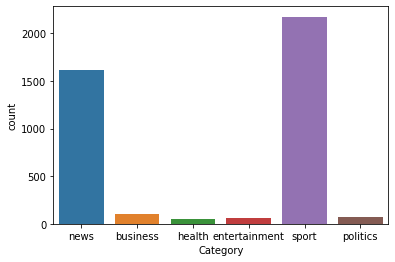

In [14]:
sns.countplot(dataset['Category']);

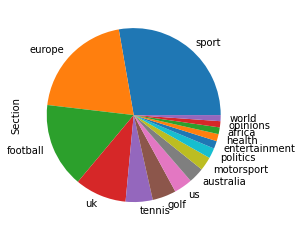

In [15]:
dataset['Section'].value_counts()[:15].plot(kind='pie');

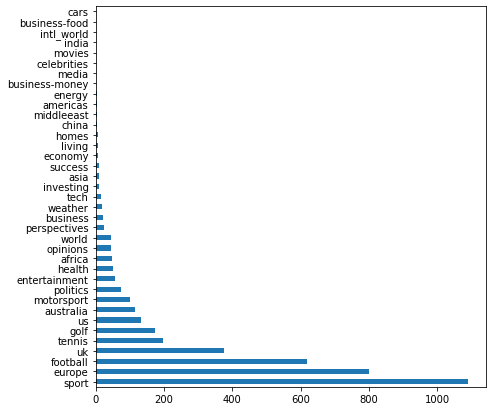

In [16]:
dataset['Section'].value_counts().plot(kind='barh', figsize=(7, 7));

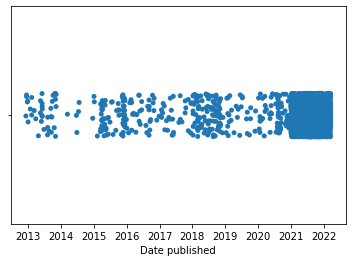

In [17]:
sns.stripplot(data=dataset, x='Date published');

# Output

In [18]:
dataset.to_csv('CNN_Articels_clean.csv', index=False)